## Part 2 - Group Presentation

Prepare a 5 minutes presentation on your Task 5 prediction work. You will be given another set of training set, testing set of you Task 5 **on 2/5/2019**. Compute the accuracy yourself and include it in your presentation. Your presentation should be focus on why would your choose that particular algorithm and what optimization/fine tuning you have done to improve the accuracy. You can also comment on your accuracy and suggest how could that be improved. 

You may use the following line to measure the accurarcy
```
groundtruth['predict'] = output['to_station_id']
groundtruth[ groundtruth['predict'] == groundtruth['to_station_id']].count()
```

Since this is a short presentation, you may assign any member to present the work.

**Note: Again, a higher accuracy does not immediate imply a higher mark.**

In [1]:
import pandas as pd
from math import isnan
import numpy as np
import math

training = pd.read_csv('data/data_set/training.csv',parse_dates=['start_time'], date_parser=lambda col: pd.to_datetime(col))
test1 = pd.read_csv('data/data_set/test1.csv',parse_dates=['start_time'], date_parser=lambda col: pd.to_datetime(col))
test2 = pd.read_csv('data/data_set/test2.csv',parse_dates=['start_time'], date_parser=lambda col: pd.to_datetime(col))
groundtruth1 = pd.read_csv('data/data_set/groundtruth1.csv',parse_dates=['start_time'], date_parser=lambda col: pd.to_datetime(col))
groundtruth2 = pd.read_csv('data/data_set/groundtruth2.csv',parse_dates=['start_time'], date_parser=lambda col: pd.to_datetime(col))



In [1]:
def preprocessing_training(training_data):
    training_data = training_data.drop(training_data.columns[0], axis=1)

    # delete the useless data
    training_data.drop(['end_time', 'bikeid', 'from_station_name', 'to_station_name'],axis = 1,inplace = True)

    # Change the types of data.
    
    training_data['usertype'] = training_data['usertype'].map(lambda x: -1 if x == 'Customer' else 1)
    training_data['gender'] = training_data['gender'].map(lambda x: 1 if x == 'Male' else (-1 if x == 'Female' else 0))
    training_data['birthyear'] = training_data['birthyear'].map(lambda x: int((2018 - x - 1) / 5) if isnan(x)is not True else 0)
    training_data['age'] = training_data['birthyear'].map(lambda x: x if x >= 0 and x <= 15 else 16)

    training_data['month'] = training_data['start_time'].dt.month
    training_data['weekday'] = training_data['start_time'].dt.dayofweek+1
    training_data['start_time'] = training_data['start_time'].dt.hour
    training_data['tripduration'] = training_data['tripduration'].map(lambda x: int(float(x.strip().replace(',', '')) / 60))
    training_data['weekend'] = training_data['weekday'].map(lambda x: 1 if x > 5 else 0)

    training_data['time_range_morning'] = training_data['start_time']\
        .map(lambda x: 1 if x>6 and x<=9 else 0)

    training_data['time_range_night'] = training_data['start_time']\
        .map(lambda x: 1 if x>14 and x<=19 else 0)

   
    
    training_data.drop(['birthyear'],axis = 1,inplace = True)
    return training_data

def preprocessing_test(test_data):
    test_data = test_data.drop(test_data.columns[0], axis=1)
    test_data.drop(['end_time', 'bikeid', 'from_station_name', 'to_station_id', 'to_station_name'],axis = 1,inplace = True)

    test_data['usertype'] = test_data['usertype'].map(lambda x: -1 if x == 'Customer' else 1)
    test_data['gender'] = test_data['gender'].map(lambda x: 1 if x == 'Male' else (-1 if x == 'Female' else 0))
    test_data['birthyear'] = test_data['birthyear'].map(lambda x: int((2018 - x - 1) / 5) if isnan(x)is not True else 0)
    test_data['age'] = test_data['birthyear'].map(lambda x: x if x >= 0 and x <= 15 else 16)

    test_data['month'] = test_data['start_time'].dt.month
    #test_data['month'] = test_data['month'].map(lambda x: 7 if x<7 else (9 if x>9 else x))
    test_data['weekday'] = test_data['start_time'].dt.dayofweek+1
    test_data['start_time'] = test_data['start_time'].dt.hour
    test_data['tripduration'] = test_data['tripduration'].map(lambda x: int(float(x.strip().replace(',', '')) / 60))
    test_data['weekend'] = test_data['weekday'].map(lambda x: 1 if x > 5 else 0)

    test_data['time_range_morning'] = test_data['start_time'].map(lambda x: 1 if x>6 and x<=9 else 0)

    test_data['time_range_night'] = test_data['start_time'].map(lambda x: 1 if x>14 and x<=19 else 0)

    test_data.drop(['birthyear'],axis = 1,inplace = True)
    return test_data


SyntaxError: unexpected character after line continuation character (<ipython-input-1-39785d53b411>, line 20)

In [3]:
import random
random.seed(1337)
training_data = preprocessing_training(training)
test_data1 = preprocessing_test(test1)
test_data2 = preprocessing_test(test2)

#clean duration
training_data = training_data[training_data['tripduration'] < 10000.0]


# we change age 0 to age 5, and delete 1, 2, 14, 15, 16
training_data['age'] = training_data['age'].map(lambda x: 5 if (x==0 and random.random()>0.40) else (6 if x==0 else x))

training_data = training_data[training_data['age'] != 1]
training_data = training_data[training_data['age'] != 2]
training_data = training_data[training_data['age'] < 14]



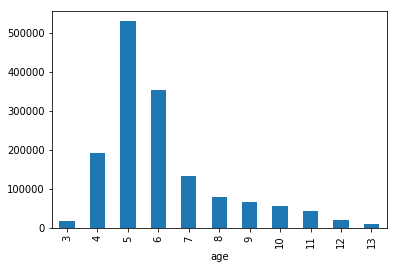

In [5]:
training_data.groupby('age').count()['gender'].plot(kind='bar')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
def t():
    ##train
    x_columns=[]
    for i in training_data.columns:
        if i not in ['to_station_id','weekday']:
            x_columns.append(i)

    x_columns.append('from_station_id')
    x_columns.append('from_station_id')
    x_columns.append('start_time')

    x_columns.append('usertype')
    x=training_data[x_columns]
    y=training_data['to_station_id']

    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.01)
    X_train=X_train.values
    X_test=X_test.values
    Y_train=Y_train.values
    Y_test=Y_test.values

    ##knn model
    estimator=KNeighborsClassifier(n_neighbors=9, weights='distance', algorithm='kd_tree', leaf_size=80, p=1)
    estimator.fit(X_train,Y_train)

    y_predicted=estimator.predict(X_test)

    accuracy=np.mean(Y_test==y_predicted)*100
    print(' training accuracy is: ', accuracy)
    
    
    ##test1
    test_columns=[]
    for i in test_data1.columns:
      if i not in ['weekday']:
        test_columns.append(i)

    test_columns.append('from_station_id')
    test_columns.append('from_station_id')
    test_columns.append('start_time')
    test_columns.append('usertype')
    test_data=test_data1[test_columns]

    test1_predicted = estimator.predict(test_data)
    real1 = groundtruth1.to_station_id.values

    test1_accuracy=np.mean(test1_predicted==real1)*100
    print(' test1 accuracy is: ', test1_accuracy)

    ##test2
    test_columns=[]
    for i in test_data2.columns:
      if i not in ['weekday']:
        test_columns.append(i)

    test_columns.append('from_station_id')
    test_columns.append('from_station_id')

    test_columns.append('start_time')
    test_columns.append('usertype')
    test_data=test_data2[test_columns]

    test2_predicted = estimator.predict(test_data)
    real2 = groundtruth2.to_station_id.values

    test2_accuracy=np.mean(test2_predicted==real2)*100
    print(' test2 accuracy is: ', test2_accuracy)



for i in range(4):
    print('this is the',(i+1),'th round')
    t()


In [267]:
test_data1.groupby('month').count()

,start_time,tripduration,from_station_id,usertype,gender,age,weekday,weekend,time_range_morning,time_range_night
month,,,,,,,,,,
9,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


In [173]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## training model knn

x_columns=[]
for i in training_data.columns:
    if i not in ['to_station_id', 'weekday']:
        x_columns.append(i)
x_columns.append('from_station_id')
x_columns.append('from_station_id')
x_columns.append('from_station_id')
x_columns.append('start_time')
x_columns.append('start_time')
x_columns.append('usertype')
x=training_data[x_columns]
y=training_data['to_station_id']

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.01)
X_train=X_train.values
X_test=X_test.values
Y_train=Y_train.values
Y_test=Y_test.values

##knn model
estimator=KNeighborsClassifier(n_neighbors=9,weights='distance',algorithm='kd_tree', p=1)
estimator.fit(X_train,Y_train)

y_predicted=estimator.predict(X_test)

accuracy=np.mean(Y_test==y_predicted)*100
print('training accuracy is: ', accuracy)


In [174]:
##predict test1

# test_data1['weekend'] = test_data1['weekday'].map(lambda x: 1 if x > 5 else 0)

test_columns=[]
for i in test_data1.columns:
  if i not in ['weekday']:
    test_columns.append(i)
test_columns.append('from_station_id')
test_columns.append('from_station_id')
test_columns.append('from_station_id')
test_columns.append('start_time')
test_columns.append('start_time')
test_columns.append('usertype')
test_data=test_data1[test_columns]

test1_predicted = estimator.predict(test_data)
real1 = groundtruth1.to_station_id.values

test1_accuracy=np.mean(test1_predicted==real1)*100
print('test1 accuracy is: ', test1_accuracy)


In [175]:
##predict test2

# test_data2['weekend'] = test_data2['weekday'].map(lambda x: 1 if x > 5 else 0)

test_columns=[]
for i in test_data2.columns:
  if i not in ['weekday']:
    test_columns.append(i)
test_columns.append('from_station_id')
test_columns.append('from_station_id')
test_columns.append('from_station_id')
test_columns.append('start_time')
test_columns.append('start_time')
test_columns.append('usertype')
test_data=test_data2[test_columns]

test2_predicted = estimator.predict(test_data)
real2 = groundtruth2.to_station_id.values

test2_accuracy=np.mean(test2_predicted==real2)*100
print('test2 accuracy is: ', test2_accuracy)
